In [21]:
# Run this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
%matplotlib inline
%load_ext autoreload
%autoreload 2

from importlib import reload
from ipynb.fs.full.preprocessing import readFile, calcClass

X_train, X_test, y_train, y_test, df, df_train, cols = readFile()
y_train_class, y_test_class = calcClass(y_train, y_test)

squared_scaler = PolynomialFeatures(degree=2)

X_train_squared = squared_scaler.fit_transform(X_train)
X_test_squared = squared_scaler.transform(X_test)

cubed_scaler = PolynomialFeatures(degree=3)
X_train_cubed = cubed_scaler.fit_transform(X_train)
X_test_cubed = cubed_scaler.transform(X_test)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
parameter_space = {
    'C': [(0.0000001), (0.00001), (0.001), (0.01), (0.1), (1), (10)],
    'penalty': ["l1", "l2"],
}

mlp = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, return_train_score=True)
clf.fit(X_train, y_train_class)

clf2 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, return_train_score=True)
clf2.fit(X_train_squared, y_train_class)

# cubed doesn't converge
# clf3 = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, return_train_score=True)
# clf3.fit(X_train_cubed, y_train_class)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, random_state=42,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1e-07, 1e-05, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [23]:
df1 = pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_train_score"], columns=["mean train score"]), pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["mean test score"])],axis=1)
df2 = pd.concat([pd.DataFrame(clf2.cv_results_["params"]),pd.DataFrame(clf2.cv_results_["mean_train_score"], columns=["mean train score"]), pd.DataFrame(clf2.cv_results_["mean_test_score"], columns=["mean test score"])],axis=1)
df = pd.concat([df1,df2], ignore_index=True)

df.to_csv('log_reg.csv')

In [24]:
print(clf.best_params_)
print(clf.best_score_)

print(clf2.best_params_)
print(clf2.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.7350298565768179
{'C': 0.1, 'penalty': 'l1'}
0.7414704554332882


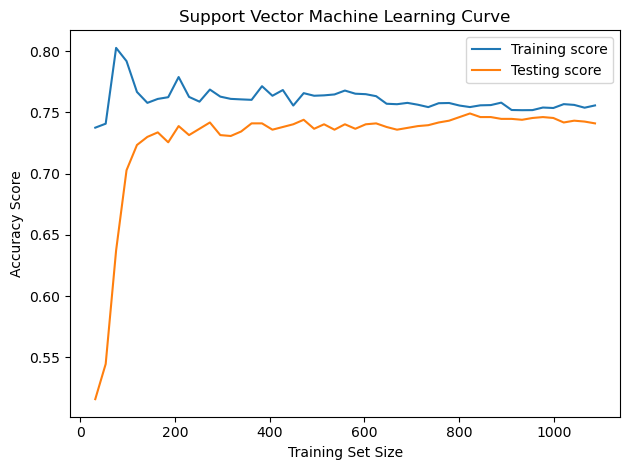

In [25]:
from sklearn.model_selection import learning_curve

clf = LogisticRegression(C=.1, penalty='l1', random_state=42, solver='liblinear', max_iter=1000000)
X_max = np.concatenate((X_train_squared, X_test_squared))
y_max = np.concatenate((y_train_class, y_test_class))

train_sizes, train_scores1, test_scores1 = learning_curve(clf, X_max, y_max, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

train_scores_mean = np.mean(train_scores1, axis=1)
test_scores_mean = np.mean(test_scores1, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Testing score")

plt.title("Support Vector Machine Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()

plt.show()

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       135
           1       0.77      0.77      0.77       137

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272



Text(0.5, 1.0, 'Accuracy Score: 0.7720588235294118')

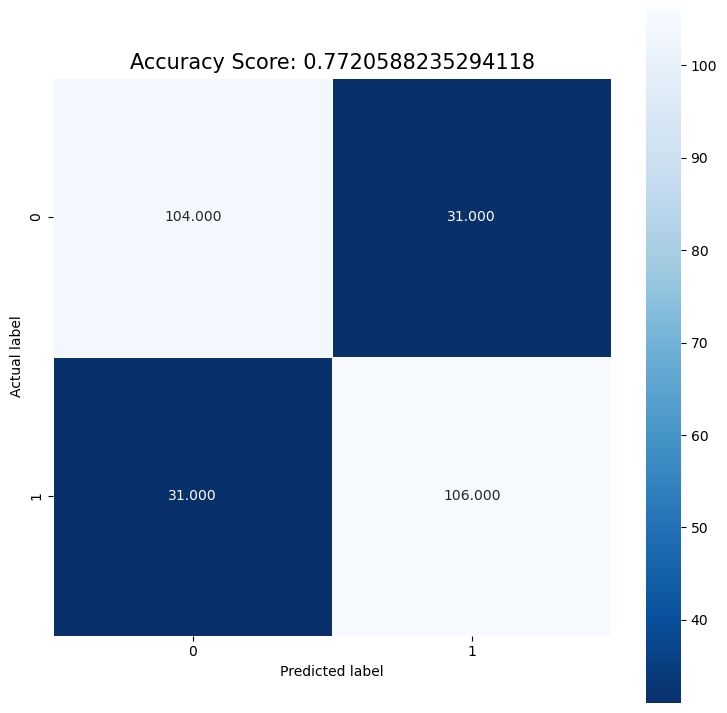

In [26]:
# confusion matrix for best algorithm

import seaborn as sns
from sklearn import metrics

clf.fit(X_train_squared, y_train_class)
yhat_test = clf.predict(X_test_squared)
score = clf.score(X_test_squared, y_test_class)

cm = metrics.confusion_matrix(y_test_class, yhat_test)


print(metrics.classification_report(y_test_class, yhat_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)